In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lazypredict
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_iris

In [31]:
df_fingerprint = pd.read_csv("fingerprint.csv")
df_fingerprint = df_fingerprint.drop(columns="Name")
df_fingerprint

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6213,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6214,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6215,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_2 = pd.read_csv("bioactivity_data_pIC50.csv")
df_2 = df_2["pIC50"]
df_2

0      6.12
1      7.00
2      4.30
3      6.52
4      6.10
       ... 
6212   3.52
6213   4.30
6214   4.23
6215   4.34
6216   4.42
Name: pIC50, Length: 6217, dtype: float64

In [33]:

df = pd.concat([df_fingerprint, df_2], axis=1)
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.12
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.00
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.52
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.52
6213,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
6214,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.23
6215,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.34


In [34]:
X = df.drop("pIC50",axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6213,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6214,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6215,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
columns = X.columns
columns

Index(['PubchemFP0', 'PubchemFP1', 'PubchemFP2', 'PubchemFP3', 'PubchemFP4',
       'PubchemFP5', 'PubchemFP6', 'PubchemFP7', 'PubchemFP8', 'PubchemFP9',
       ...
       'PubchemFP871', 'PubchemFP872', 'PubchemFP873', 'PubchemFP874',
       'PubchemFP875', 'PubchemFP876', 'PubchemFP877', 'PubchemFP878',
       'PubchemFP879', 'PubchemFP880'],
      dtype='object', length=881)

In [36]:
Y = df["pIC50"]
Y

0      6.12
1      7.00
2      4.30
3      6.52
4      6.10
       ... 
6212   3.52
6213   4.30
6214   4.23
6215   4.34
6216   4.42
Name: pIC50, Length: 6217, dtype: float64

In [37]:
#Removing low variance features

from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [38]:
X_reduced = pd.DataFrame(X, columns=columns[selection.get_support()])
X_reduced

,PubchemFP2,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP180,PubchemFP181,...,PubchemFP714,PubchemFP735,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP777,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821
0,1,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,0,1,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6213,0,0,0,1,0,1,1,1,0,0,...,1,1,1,1,0,1,1,1,1,0
6214,0,0,0,1,0,1,1,1,0,0,...,1,1,1,0,0,1,1,1,0,0
6215,0,0,0,1,1,0,0,0,0,0,...,1,1,1,0,1,1,1,1,0,1


In [39]:
X_reduced.to_csv("descriptors_list.csv")

In [40]:
#Data split (80/20 : train/test)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

In [42]:
X_train, X_train.shape

(array([[0, 1, 1, ..., 1, 1, 1],
        [0, 1, 0, ..., 0, 0, 1],
        [1, 1, 0, ..., 1, 0, 0],
        ...,
        [1, 1, 0, ..., 1, 0, 1],
        [1, 0, 0, ..., 0, 1, 0],
        [1, 1, 0, ..., 1, 0, 0]], dtype=int64),
 (4973, 135))

In [43]:
Y_train, Y_train.shape

(4300   5.00
 4726   6.37
 2394   5.00
 720    3.00
 1715   6.11
        ... 
 3328   7.00
 2779   4.87
 1006   9.49
 2752   4.96
 1809   6.20
 Name: pIC50, Length: 4973, dtype: float64,
 (4973,))

In [ ]:
#Creating and evaluating a model before tuning

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)

RandomForestRegressor()

In [62]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.5733942961440626
Mean Squared Error (MSE): 0.7679834184782725
R² Score: 0.7482503484418307


In [63]:
rf_model = RandomForestRegressor()

In [64]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [65]:
#Defining new parameters around standard parameters for tuning

rf_params = {"max_depth":[5,8,None],
             "max_features":[3,5,7,"auto"],
             "min_samples_split":[2,5,8,15,20],
             "n_estimators":[100,200,500]}

In [66]:
#Fitting parameters with Grid Search CV to find best parameters

rf_best_grid = GridSearchCV(rf_model,rf_params,cv=5,n_jobs=-1,verbose=True).fit(X,Y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [67]:
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 5,
 'min_samples_split': 5,
 'n_estimators': 200}

In [68]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_).fit(X,Y)

In [73]:
Y_pred = rf_final.predict(X_test)


In [74]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.44303488286725007
Mean Squared Error (MSE): 0.4457878163133136
R² Score: 0.8538680331821136


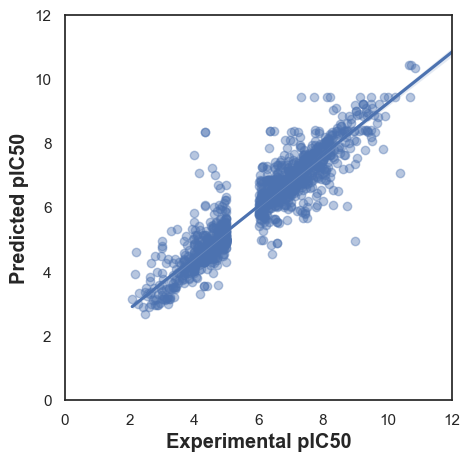

In [75]:

sns.set(color_codes=True)
sns.set_style("white")

# Specify x and y as keyword arguments
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()


In [56]:
import pickle


In [57]:
pickle.dump(rf_model, open('acetylcholinesterase_model.pkl', 'wb'))
